In [2]:
from thalamus_merfish_analysis import abc_load_base as abc

In [3]:
cells_df = abc.get_combined_metadata(version='20231215')
len(cells_df)

3739961

## Filter by neurotransmitter and explore CCF region counts

In [4]:
obs_dopa = cells_df.loc[cells_df['neurotransmitter']=='Dopa']
len(obs_dopa)

8352

In [45]:
dopa_class_counts = obs_dopa['class'].value_counts().loc[lambda x: x>0]
dopa_class_counts

class
21 MB Dopa         4015
05 OB-IMN GABA     2781
12 HY GABA          813
19 MB Glut          403
14 HY Glut          145
11 CNU-HYa GABA     139
27 MY GABA           56
Name: count, dtype: int64

In [46]:
dopa_classes = dopa_class_counts.loc[lambda x: x>100].index

In [47]:
dopa_region_counts = obs_dopa['parcellation_substructure'].value_counts().loc[lambda x: x>50]
dopa_region_counts

parcellation_substructure
MB-unassigned      1467
MOB-unassigned     1046
onl                 881
VTA                 644
OLF-unassigned      362
SNr                 270
MOBopl              258
IF                  254
HY-unassigned       239
SNc                 230
PAG-unassigned      211
CLI                 134
MRN                 130
ZI                  128
DR                  105
PVpo                 98
DMH                  93
ARH                  92
ml                   92
PH                   90
SUM                  88
rust-unassigned      69
RR                   64
RL                   59
PVi                  54
IPDM                 53
unassigned           52
Name: count, dtype: int64

## filter by CCF structure and load gene expression

In [48]:
dopa_substructures = dopa_region_counts.loc[lambda x: x>150].index
# cells_dopa_ccf_subset = cells_df[cells_df['parcellation_substructure'].isin(dopa_substructures)]
cells_dopa_ccf_subset = abc.filter_by_ccf_region(cells_df, dopa_substructures, buffer=0)
cells_dopa_ccf_subset = abc.filter_by_class(cells_dopa_ccf_subset, include=dopa_classes)
len(cells_dopa_ccf_subset)

103745

In [50]:
cells_dopa_ccf_subset['class'].value_counts().loc[lambda x: x>0]

class
05 OB-IMN GABA     66934
19 MB Glut         21023
12 HY GABA          5246
14 HY Glut          4663
11 CNU-HYa GABA     2999
21 MB Dopa          2880
Name: count, dtype: int64

In [53]:
section_counts = cells_dopa_ccf_subset['z_section'].value_counts()
section_counts.head(20)

z_section
14.2    19367
13.8    18068
13.0    10297
12.2     8357
12.0     4953
11.8     3345
6.2      2186
6.4      2152
3.6      2143
4.0      1987
4.2      1940
7.0      1915
3.8      1876
5.0      1658
5.6      1614
6.8      1557
5.8      1502
11.4     1499
5.4      1454
4.6      1406
Name: count, dtype: int64

In [7]:
adata = abc.load_adata(transform='raw', from_metadata=cells_dopa_ccf_subset)
len(adata)

## plot

In [57]:
from importlib import reload
reload(abc)

<module 'thalamus_merfish_analysis.abc_load_base' from '/root/capsule/code/thalamus_merfish_analysis/abc_load_base.py'>

In [11]:
from thalamus_merfish_analysis import ccf_plots
%matplotlib inline

ccf_polygons = abc.get_ccf_labels_image()

In [75]:

kwargs = dict(
    section_col='z_reconstructed',
    x_col = 'x_reconstructed',
    y_col = 'y_reconstructed',
    ccf_names=abc.get_ccf_names(level='substructure'),
    s=3, 
    shape_palette='dark_outline',
    custom_xy_lims=[3, 8, 3, 8]
    # boundary_img=ccf_boundaries
)

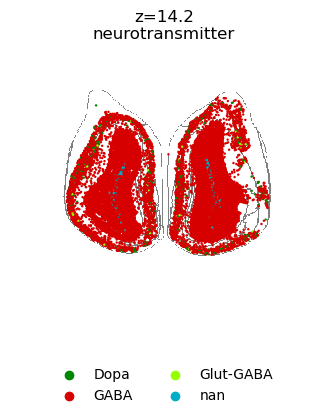

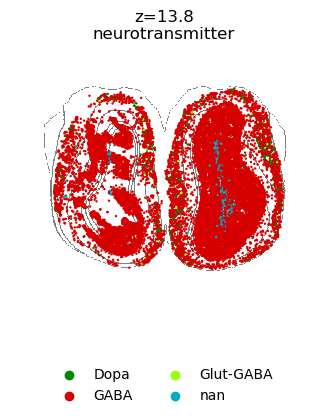

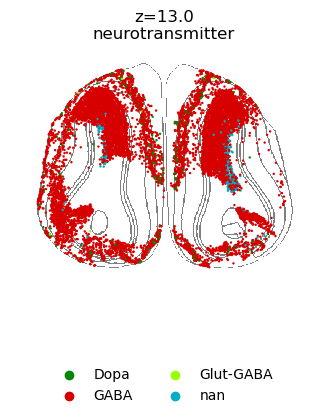

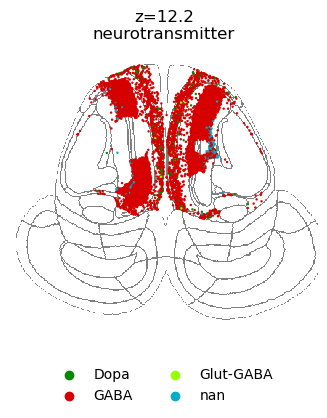

In [78]:
ccf_plots.plot_ccf_overlay(cells_dopa_ccf_subset, ccf_polygons, point_hue='neurotransmitter',
                           sections=section_counts.index[:4],
                           **kwargs);